<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/bovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Após a década de 80 e 90, período no qual houveram diversos avanços tecnológicos e uma maior integração entre os mercados de diferentes países, o estudo e aplicação de técnicas no mercado financeiro se tornou ainda mais evidente.

Neste quesito, utilizar técnicas matemáticas e estatísticas para entender o comportamento do mercado se tornou algo muito comum após o o banco JP Morgan divulgou seu serviço RiskMetrics divulgar o VaR (Value at Risk) que consiste em uma métrica, utilizando estatística, para estimar o máximo de valor que seu ativo poderá perder em um único dia.

Neste contexto, iremos analisar os dados de ação da BOVESPA, a bolsa de valores do Brasil com índices diários dos últimos 3 anos. Com estes dados e seguindo o passo a passo das perguntas abaixo, iremos calcular a maior perda esperada para o meu ativo no dia posterior.

Primeiro, para fazer o download dos dados, utilize o código abaixo para gerar o dataset:

In [57]:
!pip install yfinance -q

# -- Importação de bibliotecas e dados
import pandas as pd
import yfinance as yf

msft = yf.Ticker("BOVA11.SA")

# -- Dataset Histórico
df = msft.history(interval='1d', start='2019-01-01', end='2022-07-28')
df['diff'] = df['Close'] - df['Open']
print(df.shape)
display(df)

(886, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff
Date,,,,,,,,
2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003
2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997
2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003
2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998
2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002
...,...,...,...,...,...,...,...,...
2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001
2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003
2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002


Importando as bibliotecas

In [58]:
import numpy as np
import pandas as pd

import datetime as dt
#bibliotecas para gráficos 2D estáticos
import seaborn as sns
import matplotlib.pyplot as plt
#biblioteca para gráficos interativos, pode fazer em 2D ou 3D
#plotly.express --> fornece funções para visualizar uma variedade de gráficos com vários tipos de dados
import plotly.express as px
import plotly.graph_objects as go

Defina aspectos do tema visual para todos os gráficos matplotlib e seaborn usa-se a sns.set_theme(), pra deixar o aspecto visual mais bonito, pois os gráficos padrão do matplotlib são feios

In [59]:
sns.set_theme(
    context='talk', #deixar os gráficos numa escala com fontes maiores
    style='ticks', #fundo branco
    font_scale= 0.8, #ajuste tamanho da fonte
    rc={
        'figure.figsize': (10,6), #definir o padrão pro tamanho da figura
        'axes.grid': True,
        'grid.alpha':0.2
    }
)

1 - Calcule média, desvio padrão, e a moda da coluna dif?

In [60]:
#calculando a média
df['diff'].mean()

-0.07477434386518148

In [61]:
#calculando desvio padrão
df['diff'].std()

1.1631112620322424

In [62]:
#calculando a moda
df['diff'].mode().values

array([0.])

In [63]:
# ou poderia passar tudo como uma lista usando a função agg(agrega todos os valores e transforma e um só). Porém não pega na moda
df['diff'].agg(['mean','std'])

mean   -0.074774
std     1.163111
Name: diff, dtype: float64

In [64]:
#criar uma função para pegar a moda
def mode(values):
  return pd.Series.mode(values)[0]

mode(df['diff'])

0.0

In [65]:
#mostrando as três 
df['diff'].agg(['mean','std', mode])

mean   -0.074774
std     1.163111
mode    0.000000
Name: diff, dtype: float64

2 - Construa um gráfico de boxplot do dif e responda, qual é (aproximadamente) o valor do outlier mais distante?

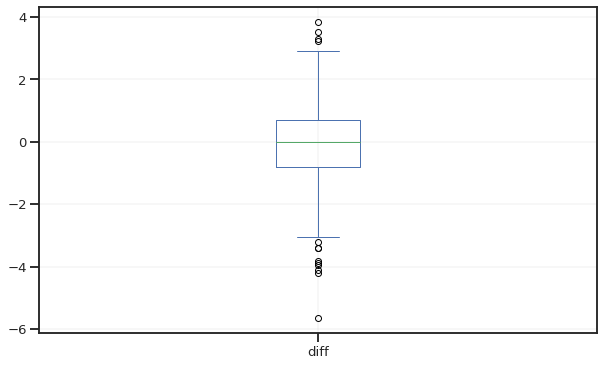

In [66]:
df['diff'].plot.box()
plt.show()

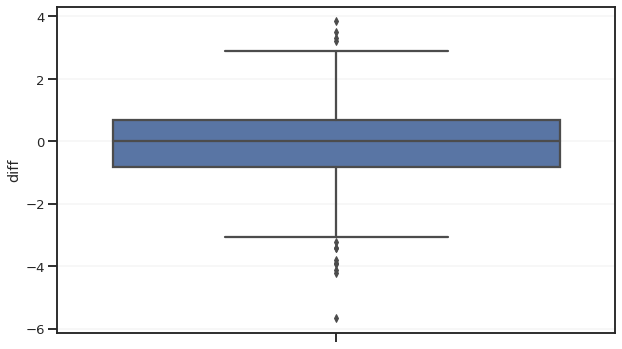

In [67]:
#fazendo usando o seaborn
sns.boxplot(data=df, y='diff')

In [68]:
#usando plotly.express as px
px.box(data_frame=df, y='diff')

3 - Calcule a maior amplitude do dia (High - Low), qual seria a média e variância dessa amplitude para os dados?

In [69]:
df['amplitude'] = df.High  - df.Low # ou posso escrever df['amplitude'] = df['High'] - df['Low']
display(df)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff,amplitude
Date,,,,,,,,,
2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003,3.910004
2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997,1.599998
2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003,1.820000
2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998,1.260002
2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002,1.099998
...,...,...,...,...,...,...,...,...,...
2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001,1.909996
2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003,1.340004
2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002,0.900002


In [70]:
#calculando a média e a variância
df['amplitude'].agg(['mean', 'std'])

mean    1.786829
std     1.008223
Name: amplitude, dtype: float64

4 - Utilizando a coluna de data (agrupando por mês e ano) e o dif, qual foi o período com maior saldo negativo? (Entende-se por saldo negativo as somas das diferenças diárias)

In [71]:
df['month'] = df.index.month
df['year'] = df.index.year
display(df)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff,amplitude,month,year
Date,,,,,,,,,,,
2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003,3.910004,1,2019
2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997,1.599998,1,2019
2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003,1.820000,1,2019
2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998,1.260002,1,2019
2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002,1.099998,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001,1.909996,7,2022
2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003,1.340004,7,2022
2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002,0.900002,7,2022


In [72]:

#agrupo por mês e ano, pego a coluna diff, somo e ordeno
df.groupby(['month','year'])['diff']


In [73]:
#caso a coluna data não estivesse no índice
df = df.reset.index()

AttributeError: ignored